In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as ply
plt.style.use("seaborn")

## Historical data analysis 

In [3]:
historical_data = pd.read_csv('Data/historical_data_clean.csv')
historical_data['Date'] = pd.to_datetime( historical_data['Date'])
historical_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-31,13.20,13.20,12.95,13.05,13.05,4497
1,2022-01-28,13.20,13.20,12.95,13.05,13.05,5303
2,2022-01-27,13.05,13.20,12.95,13.05,13.05,5538
3,2022-01-26,13.25,13.25,12.95,13.05,13.05,6805
4,2022-01-25,13.25,13.25,13.05,13.05,13.05,1968
...,...,...,...,...,...,...,...
254,2021-02-05,13.90,13.90,13.50,13.60,6.58,1920
255,2021-02-04,13.70,14.10,13.50,13.70,6.63,4801
256,2021-02-03,13.70,13.70,13.30,13.70,6.63,1326
257,2021-02-02,13.40,13.70,13.10,13.50,6.53,7607


- Numirical column describe of the last 9O days :

In [4]:
historical_data.iloc[-90:].describe().astype(int)


,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,13,13,12,13,6,3347
std,0,0,0,0,0,2615
min,12,12,12,12,6,325
25%,12,13,12,12,6,1331
50%,13,13,12,13,6,2699
75%,13,13,12,13,6,4500
max,14,14,13,13,6,14298


In last 90 days, the average closing price for IAM stock was about 13£.
For about 75% of time the stock was trading below 13£ and it clocked maximum of 13£. The maximum volume of shares traded on a single day was 14298£ with median quantity being 2699£.

- General variation in the stock price:

we’ll set the ‘Date’ column as the index of the dataframe. It makes plotting easy.

In [5]:
historical_data.index = historical_data['Date']

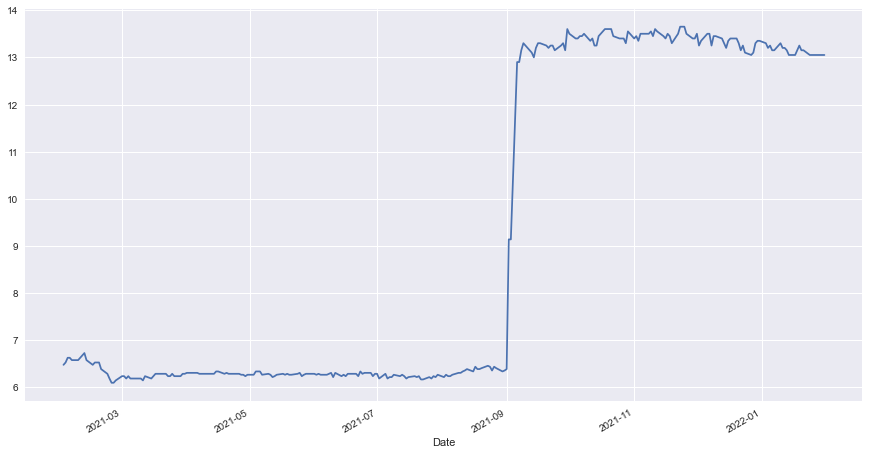

In [6]:
historical_data['Adj Close'].plot(figsize = (15,8))
plt.show()

In the above plot, we notice, there is a drastic decrease in the price of stock  in the period from march 2021 to september 2021.
After the general decline , there was a remarkable jump in the stock price of IAM  and it continued for the rest of the year.

- Day-to-day percentage change(Daily returns):

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. 

In [10]:
historical_data['Day_Perc_Change']= historical_data['Adj Close'].pct_change()*(-100)
historical_data['Day_Perc_Change']

Date
2022-01-31         NaN
2022-01-28   -0.000000
2022-01-27   -0.000000
2022-01-26   -0.000000
2022-01-25   -0.000000
                ...   
2021-02-05   -0.000000
2021-02-04   -0.759878
2021-02-03   -0.000000
2021-02-02    1.508296
2021-02-01    0.765697
Name: Day_Perc_Change, Length: 259, dtype: float64

In [11]:
historical_data['Day_Perc_Change'].isna()

Date
2022-01-31     True
2022-01-28    False
2022-01-27    False
2022-01-26    False
2022-01-25    False
              ...  
2021-02-05    False
2021-02-04    False
2021-02-03    False
2021-02-02    False
2021-02-01    False
Name: Day_Perc_Change, Length: 259, dtype: bool

In [12]:
historical_data.dropna(axis = 0, inplace = True)

Representing daily returns in form of a plot:

<AxesSubplot:xlabel='Date'>

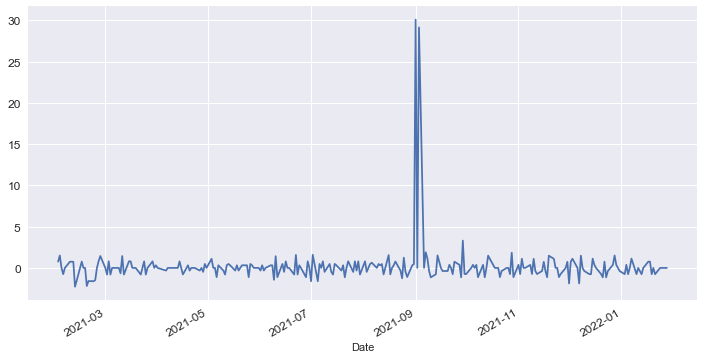

In [13]:
historical_data['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -1% to 1% with few spikes in between crossing 30% .

- Plotting daily returns distribution histogram:

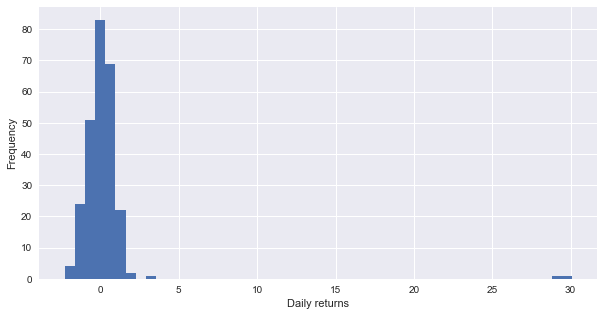

count    258.000000
mean       0.225535
std        2.720739
min       -2.279635
25%       -0.480769
50%       -0.000000
75%        0.472260
max       30.087527
Name: Day_Perc_Change, dtype: float64

In [14]:
historical_data['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
historical_data.Day_Perc_Change.describe()

The daily returns histogram is centered about origin. For the past  year, the mean daily returns has been about 0.225 and for most of the days the daily return was less than 1% implying that the IAM stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 2.279% and was 30.08% in negative direction.

- Trend Analysis :

 We add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship 

In [15]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
historical_data['Trend']= np.zeros(historical_data['Day_Perc_Change'].count())
historical_data['Trend']= historical_data['Day_Perc_Change'].apply(lambda x:trend(x))
historical_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2022-01-28,2022-01-28,13.20,13.20,12.95,13.05,13.05,5303,-0.0,Slight or No change
2022-01-27,2022-01-27,13.05,13.20,12.95,13.05,13.05,5538,-0.0,Slight or No change
2022-01-26,2022-01-26,13.25,13.25,12.95,13.05,13.05,6805,-0.0,Slight or No change
2022-01-25,2022-01-25,13.25,13.25,13.05,13.05,13.05,1968,-0.0,Slight or No change
2022-01-24,2022-01-24,13.05,13.25,12.80,13.05,13.05,4949,-0.0,Slight or No change


We wish to see how the stock was trending in past 2 years. This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.

- Visualizing Trend Frequency with Pie-Chart :

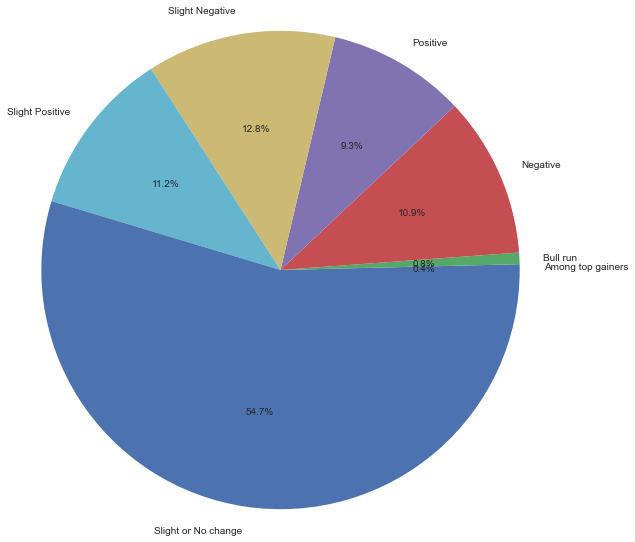

In [16]:
HD_pie_data = historical_data.groupby('Trend')
pie_label = sorted([i for i in historical_data.loc[:, 'Trend'].unique()])
plt.pie(HD_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

For the period under consideration from Feb first  2021 to 31 Jan 2020, the IAM stock never was among the top gainers , and among the top losers for 0.4 % of the time . For about 10.9% of the time period, the stock has performed positively . Likewise, for most period of time (about 54.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

- Daily Returns and Volume :

<AxesSubplot:xlabel='Date'>

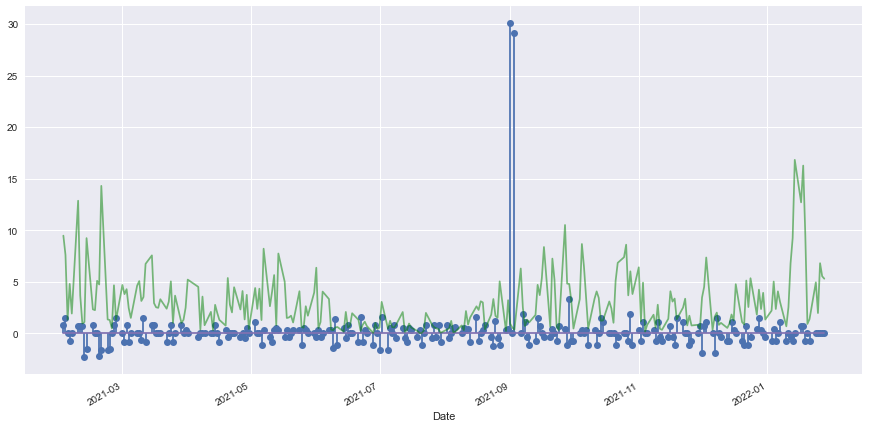

In [17]:
plt.stem(historical_data['Date'], historical_data['Day_Perc_Change'])
(historical_data['Volume']/1000).plot(figsize = (15, 7.5),  color = 'green', alpha = 0.5) 

(* Daily volume of trade has been reduced in scale to match with the daily return scale)
By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders and investors. 